In [1]:
import pickle

# Specify the path to your .pkl file
pkl_file_path = 'datasets\ServerMachineDataset\processed\machine-1-1_test.pkl'

# Open and read the .pkl file
with open(pkl_file_path, 'rb') as file:
    loaded_data = pickle.load(file)

In [2]:
import pandas as pd
pd.DataFrame(loaded_data)



,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.075269,0.065678,0.070234,0.074332,0.0,0.933333,0.274011,0.0,0.031081,0.000000,...,0.0,0.008596,0.068036,0.048893,0.000386,0.000034,0.064432,0.064500,0.0,0.0
1,0.086022,0.080508,0.075808,0.076655,0.0,0.930769,0.274953,0.0,0.031081,0.000122,...,0.0,0.008596,0.070020,0.050437,0.000386,0.000022,0.065228,0.065224,0.0,0.0
2,0.075269,0.064619,0.071349,0.074332,0.0,0.928205,0.274953,0.0,0.030940,0.000366,...,0.0,0.008596,0.069684,0.055069,0.000386,0.000045,0.067111,0.067178,0.0,0.0
3,0.086022,0.048729,0.063545,0.070848,0.0,0.928205,0.273070,0.0,0.027250,0.000244,...,0.0,0.010029,0.073253,0.051467,0.000000,0.000034,0.066676,0.066744,0.0,0.0
4,0.086022,0.051907,0.062430,0.070848,0.0,0.933333,0.274011,0.0,0.030940,0.000244,...,0.0,0.008596,0.070932,0.051467,0.000386,0.000022,0.066604,0.066671,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28474,0.075269,0.051907,0.047938,0.047619,0.0,0.907692,0.257062,0.0,0.043571,0.000244,...,0.0,0.031519,0.046733,0.040144,0.000000,0.000022,0.042931,0.043000,0.0,0.0
28475,0.064516,0.025424,0.039019,0.044135,0.0,0.905128,0.257062,0.0,0.032501,0.000000,...,0.0,0.031519,0.047438,0.048893,0.000000,0.000056,0.046550,0.046619,0.0,0.0
28476,0.064516,0.080508,0.050167,0.047619,0.0,0.907692,0.258004,0.0,0.026114,0.000611,...,0.0,0.031519,0.046797,0.040144,0.000386,0.000045,0.043003,0.043000,0.0,0.0
28477,0.064516,0.056144,0.047938,0.046458,0.0,0.902564,0.257062,0.0,0.033210,0.000122,...,0.0,0.031519,0.041884,0.043232,0.000000,0.000045,0.039890,0.039959,0.0,0.0


In [3]:
swat = pd.read_csv('datasets\data\SWaT_Dataset_Attack_v0.csv')
swat.columns

Index([' Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201',
       'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203',
       ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602',
       'P603', 'Normal/Attack'],
      dtype='object')

In [4]:

#from matplotlib import pyplot as plt
#for c in swat.columns[1:51]:
#    fig = plt.figure()
#    plt.plot(swat[c].values)
#    plt.plot(swat['Normal/Attack']=='Normal')

In [5]:
swat = swat.drop(' Timestamp', axis=1)
labels = (swat['Normal/Attack'].values=='Attack')
values = swat.drop('Normal/Attack', axis=1).values


#from sklearn.preprocessing  import StandardScaler
#scaler = StandardScaler()
#values = scaler.fit_transform(values) 

In [6]:
x = values[:, 6]
plt.plot(x)


NameError: name 'plt' is not defined

In [ ]:
train_test_split=0.7

train_values = values[:int(train_test_split*len(labels)),:]
train_labels = labels[:int(train_test_split*len(labels))]

test_values = values[int(train_test_split*len(labels)):,:]
test_labels = labels[int(train_test_split*len(labels)):]

train_values[train_labels==False].shape

(265664, 51)

In [ ]:
import pickle

#dump train values into file
path = 'datasets/data/processed/SWAT_train.pkl'
with open(path, 'wb') as file:
    pickle.dump(train_values, file)



#dump test values into file
path = 'datasets/data/processed/SWAT_test.pkl'
with open(path, 'wb') as file:
    pickle.dump(test_values, file)


#dump test labels into file
path = 'datasets/data/processed/SWAT_test_label.pkl'
with open(path, 'wb') as file:
    pickle.dump(test_labels, file)

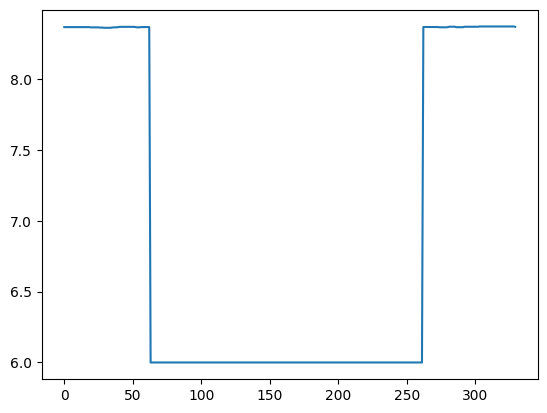

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
x = values[:, 6]
plt.plot(x[7170:7500])
#plt.plot(x)

In [ ]:
from scipy import stats

fft_result = np.fft.fft(x)
log_amplitude = np.log(np.abs(fft_result))
phase = np.angle(fft_result)
window_size = 20
smoothed_log_amplitude = np.convolve(log_amplitude, np.ones(window_size)/window_size, mode = 'same')
residual_log_amplitude = smoothed_log_amplitude-log_amplitude
im_unit = 1j
sr = np.abs(np.fft.ifft(np.exp(residual_log_amplitude + im_unit*phase)))
tau = 1
sr_mean = np.mean(sr)
sr_var = np.var(sr)
outliers =  ((sr-sr_mean) > tau*sr_mean)
x_replaced = x
x_replaced[outliers] = stats.mode(x)[0]

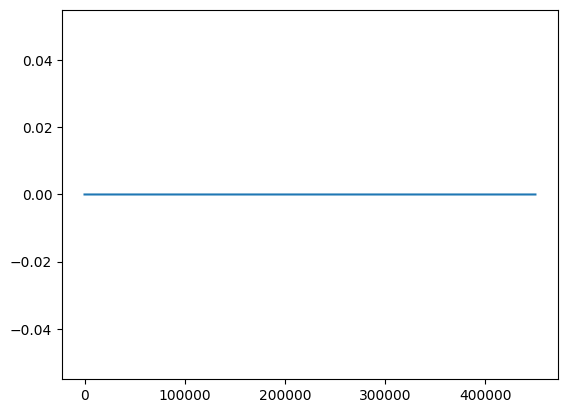

In [ ]:
np.where(outliers)
plt.figure()
#plt.plot(x_replaced[7270:7400])
#plt.plot(x[7270:7400])
plt.plot(outliers)

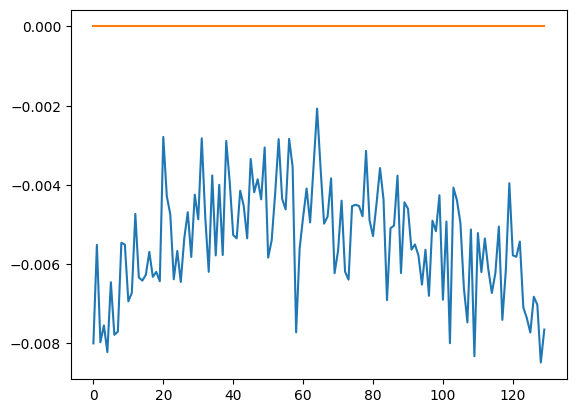

In [ ]:
plt.figure()
res = sr-sr_mean
plt.plot(res[7270:7400])
plt.plot(outliers[7270:7400])


In [ ]:
np.sum(outliers)

42

In [ ]:
import numpy as np
def spectral_residual_replace(x, tau=20, window_size=20):
    #compute fourier transform
    fft_result = np.fft.fft(x)

    #compute phase and log amplitude of fft
    log_amplitude = np.log(np.abs(fft_result)) 
    phase = np.angle(fft_result)
    
    #smooth the amplitude and compute the residual
    smoothed_log_amplitude = np.convolve(log_amplitude, np.ones(window_size)/window_size, mode = 'same')
    residual_log_amplitude = smoothed_log_amplitude-log_amplitude
    
    #compute the spectral residual
    im_unit = 1j
    sr = np.abs(np.fft.ifft(np.exp(residual_log_amplitude + im_unit*phase)))
    
    #identify outliers
    sr_mean = np.mean(sr)
    sr_var = np.var(sr)
    outliers =  ((sr-sr_mean) > tau*sr_mean)
    
    #replace outliers
    x_replaced = x
    x_replaced[outliers] = np.mean(x) 

    return x_replaced



In [ ]:
import pandas as pd
wadi = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/WADI_attackdataLABLE.csv', delimiter=',', skiprows=1 )
#skab_attack = pd.read_csv('C:/Users/g.nenna/Documents/GitHub/mtad-gat-pytorch/datasets/data/SKAB/attacks/2.csv', delimiter=';')
wadi = wadi.drop('Row ', axis=1)
wadi = wadi.drop('Date ', axis=1)
wadi = wadi.drop('Time', axis=1)
wadi = wadi.drop('2_LS_001_AL', axis=1) #nan column
wadi = wadi.drop('2_LS_002_AL', axis=1) #nan column
wadi = wadi.drop('2_P_001_STATUS', axis=1) #nan column
wadi = wadi.drop('2_P_002_STATUS', axis=1) #nan column
wadi = wadi.dropna(axis=0)

labels = (wadi['Attack LABLE (1:No Attack, -1:Attack)'].values==-1)
values = wadi.drop('Attack LABLE (1:No Attack, -1:Attack)', axis=1).values
        

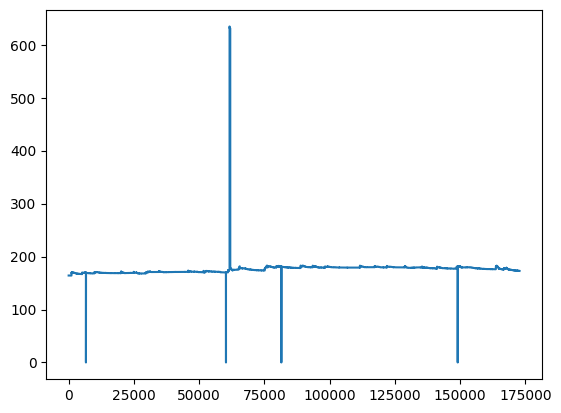

In [ ]:
from sklearn.preprocessing  import StandardScaler, QuantileTransformer
from matplotlib import pyplot as plt
scaler = QuantileTransformer(output_distribution='normal')
values_scaled = scaler.fit_transform(values)
plt.plot(values[:,0])

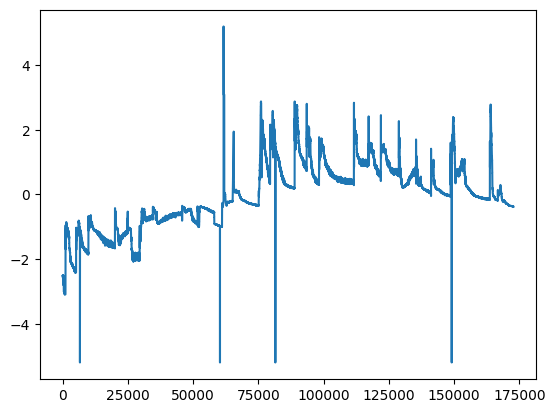

In [ ]:
plt.plot(values_scaled[:,0])

0.0577362661527867

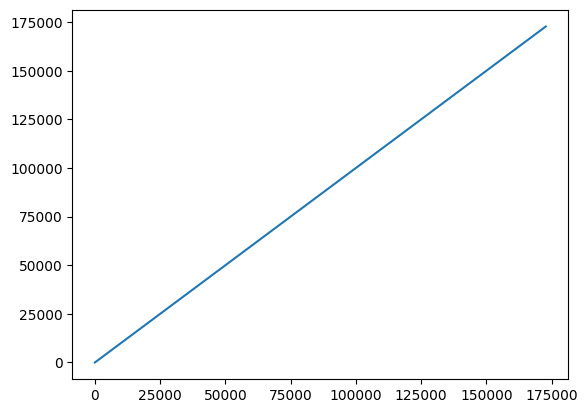

In [ ]:
plt.plot(wadi['Row '])

np.sum(wadi['Attack LABLE (1:No Attack, -1:Attack)']==-1)/172803

In [ ]:
wadi.iloc[2,80:90]

2_MV_101_STATUS         1.0
2_MV_201_STATUS         1.0
2_MV_301_STATUS         2.0
2_MV_401_STATUS         1.0
2_MV_501_STATUS         2.0
2_MV_601_STATUS         2.0
2_P_001_STATUS          NaN
2_P_002_STATUS          NaN
2_P_003_SPEED     -0.016157
2_P_003_STATUS          1.0
Name: 2, dtype: object

In [ ]:
wadi['2_P_001_STATUS']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
172798   NaN
172799   NaN
172800   NaN
172801   NaN
172802   NaN
Name: 2_P_001_STATUS, Length: 172803, dtype: float64

In [ ]:
import pandas as pd
skab = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/SKAB/anomaly-free.csv', delimiter=';' )

skab

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
0,2020-02-08 13:30:47,0.202394,0.275154,2.16975,0.382638,90.6454,26.8508,238.852,122.664
1,2020-02-08 13:30:48,0.203153,0.277857,2.07999,-0.273216,90.7978,26.8639,227.943,122.338
2,2020-02-08 13:30:50,0.202054,0.275790,2.52577,0.382638,90.7730,26.8603,223.486,121.338
3,2020-02-08 13:30:51,0.203595,0.278101,2.49742,0.054711,90.8424,26.8616,244.904,121.664
4,2020-02-08 13:30:52,0.201889,0.276363,2.29194,0.710565,90.6664,26.8603,239.196,122.000
...,...,...,...,...,...,...,...,...,...
9400,2020-02-08 16:16:43,0.225744,0.267921,2.91598,0.054711,88.8593,29.3792,219.542,126.000
9401,2020-02-08 16:16:44,0.205870,0.258370,1.71505,0.710565,89.1754,29.3692,221.862,126.000
9402,2020-02-08 16:16:45,0.219222,0.267244,2.35834,-0.273216,89.1306,29.3674,226.050,126.679
9403,2020-02-08 16:16:46,0.219481,0.271278,2.49108,0.054711,88.5447,29.3757,226.343,127.000


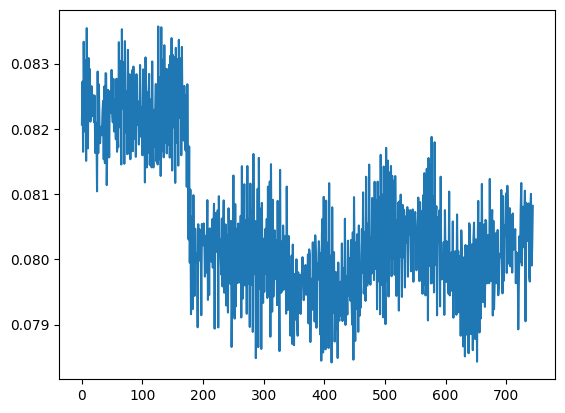

In [ ]:
from matplotlib import pyplot as plt
skab_attack = pd.read_csv(
    'C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/SKAB/attacks/1.csv', 
    delimiter=';' )

plt.plot(skab_attack.iloc[:,1])


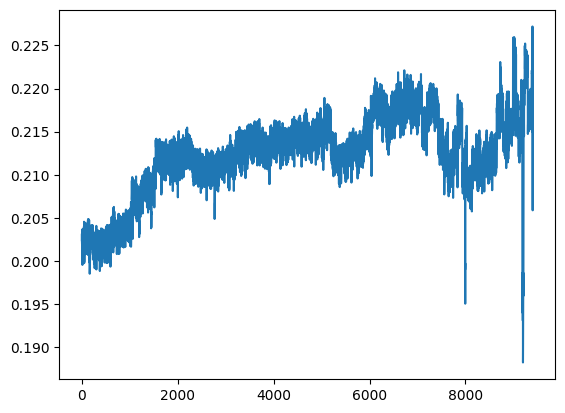

In [ ]:
plt.plot(skab.iloc[:,1])

In [ ]:
kpi = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/KPI/train.csv' )
kpi

,timestamp,value,label,KPI ID
0,1493568000,1.901639,0,02e99bd4f6cfb33f
1,1493568060,1.786885,0,02e99bd4f6cfb33f
2,1493568120,2.000000,0,02e99bd4f6cfb33f
3,1493568180,1.885246,0,02e99bd4f6cfb33f
4,1493568240,1.819672,0,02e99bd4f6cfb33f
...,...,...,...,...
2476310,1496895300,0.161922,1,88cf3a776ba00e7c
2476311,1496895360,0.162297,1,88cf3a776ba00e7c
2476312,1496895420,0.160597,1,88cf3a776ba00e7c
2476313,1496895480,0.160393,1,88cf3a776ba00e7c


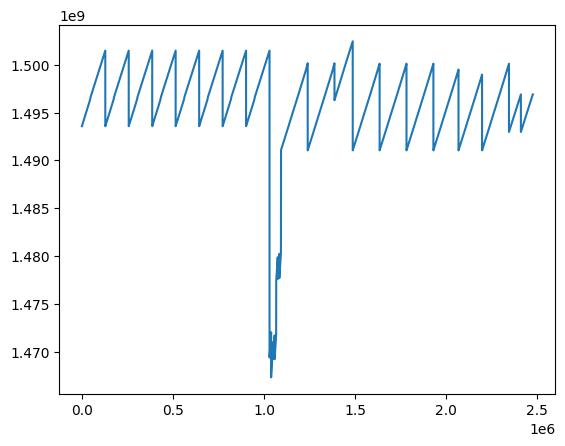

In [ ]:
plt.plot(kpi['timestamp'])


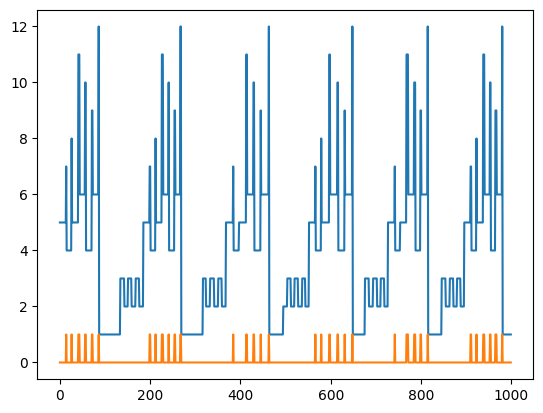

In [48]:
from matplotlib import pyplot as plt
X_train = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/ACT/Train/X_train.txt', delimiter=' ', header=None)
X_test = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/ACT/Test/X_test.txt', delimiter=' ', header=None)

X = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_train = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/ACT/Train/Y_train.txt', delimiter=' ', header=None)
y_test = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/ACT/Test/Y_test.txt', delimiter=' ', header=None)

Y = pd.concat([y_train, y_test], axis=0, ignore_index=True)
y_anomaly = ([x in range(7,13) for x in Y.values])
plt.figure()
plt.plot(y_train[0:1000])
plt.plot(y_anomaly[0:1000])
#plt.plot(X_train.iloc[0:1000,2])


In [51]:
import numpy as np
np.array(y_anomaly)

array([False, False, False, ..., False, False, False])

(array([2299.,  987., 1293., 1423., 1413.,   47.,   23.,   75.,   60.,
         147.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

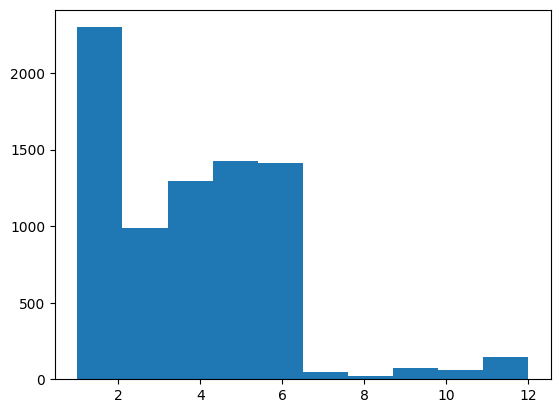

In [23]:
plt.hist(y_train)

In [31]:
X

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10924,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,-0.534817,0.244280,...,0.125445,-0.390349,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104
10925,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,-0.557925,0.244280,...,0.150787,-0.336001,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748
10926,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,-0.604403,0.079255,...,-0.004765,-0.139894,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527
10927,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,-0.569571,0.079255,...,0.013540,-0.224141,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865


In [52]:
from scipy.io import arff
import pandas as pd

# Replace 'your_file.arff' with the actual path to your ARFF file
file_path = 'C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/EEG/EEG Eye State.arff'

# Load ARFF file
data, meta = arff.loadarff(file_path)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


           AF3       F7       F3      FC5       T7       P7       O1       O2  \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            P8       T8    

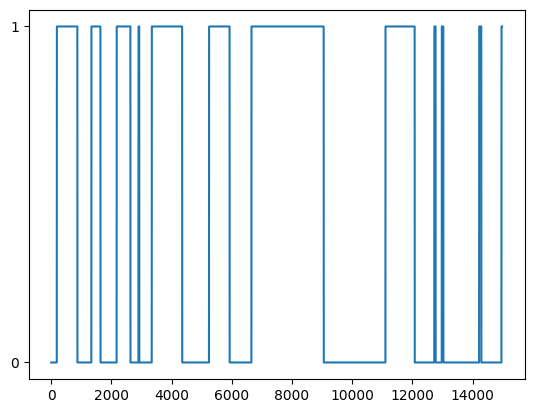

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
plt.figure()
#plt.plot(scaler.fit_transform(df.iloc[0:1000,0].values.reshape(-1,1)))
plt.plot(df.iloc[:,14].values)

In [67]:
metro = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/MetroPT3.csv')

In [71]:
metro.timestamp = pd.to_datetime(metro.timestamp)
metro.timestamp

0         2020-02-01 00:00:00
1         2020-02-01 00:00:10
2         2020-02-01 00:00:19
3         2020-02-01 00:00:29
4         2020-02-01 00:00:39
                  ...        
1516943   2020-09-01 03:59:10
1516944   2020-09-01 03:59:20
1516945   2020-09-01 03:59:30
1516946   2020-09-01 03:59:40
1516947   2020-09-01 03:59:50
Name: timestamp, Length: 1516948, dtype: datetime64[ns]

In [93]:
start_attack = ['2020-04-18 00:00:00', '2020-05-29 23:30:00', '2020-06-05 10:00:00', '2020-07-15 14:30:00']
end_attack = ['2020-04-18 23:59:00', '2020-05-30 06:00:00', '2020-06-07 14:30:00', '2020-07-15 19:00:00']
label = np.zeros(metro.shape[0])
for i in range(4):
    label += ((metro.timestamp>=start_attack[i] ) & (metro.timestamp<=end_attack[i])).values
label = label==1

test_mask = (metro.timestamp >= '2020-04-17 00:00:00') & (metro.timestamp <= '2020-07-16 00:00:00')
train_mask = np.logical_not(test_mask)
metro_test = metro[test_mask]
metro_train = metro[train_mask]


In [90]:
((metro.timestamp>=start_attack[i] ) & (metro.timestamp<=end_attack[i])).values

array([False, False, False, ..., False, False, False])

In [97]:
metro_test.iloc[:,2:]

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
556263,-0.012,9.342,9.332,-0.022,9.342,61.100,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
556264,-0.014,9.328,9.316,-0.024,9.326,60.800,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
556265,-0.014,9.316,9.304,-0.024,9.314,60.575,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
556266,-0.014,9.300,9.288,-0.024,9.300,60.375,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
556267,-0.012,9.284,9.274,-0.024,9.284,60.100,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174484,-0.012,9.880,9.870,-0.014,9.882,75.550,3.8575,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1174485,-0.012,9.836,9.824,-0.014,9.838,75.525,3.8250,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1174486,-0.010,9.798,9.788,-0.014,9.800,75.475,3.9050,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1174487,-0.008,9.762,9.748,-0.014,9.764,75.275,3.9225,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
